In [1]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import numpy as np
from matplotlib import pyplot as plt

from IPython.display import Markdown

# PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs ($x$) and outputs ($y$) of a model, as well as the model’s parameters (weights).

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. 

[Additional Reading](https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html)

In [2]:
a = np.array([[1,2],[3,4]])
t1 = torch.tensor(a)
t2 = torch.from_numpy(a)
t3 = torch.tensor([[1,2]])
print(t3.dtype)
t4 = torch.tensor([[2,3]], dtype=torch.float16)
print(t4.dtype)

t5 = torch.ones_like(t3)
print(t5)


torch.int64
torch.float16
tensor([[1, 1]])


## Pytorch AutoGrad

In [3]:
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3 * x + 1
y.backward()
print(x.grad) # gradient of y w.r.t x at x=2

tensor([7.])


## Perceptron
Build a perceptron featuring three inputs and a single output. Initialize all weights ($𝑤_0$, $𝑤_2$, $𝑤_3$) to 1, considering a bias term. Take a training data point, 𝑥1=4, 𝑥2=-1, and 𝑦=1. Employ the backpropagation algorithm to demonstrate how this neural network evolves during the processing of the given training example. Set the learning rate (𝛼) to 0.5 and utilize the squared loss function.

In [4]:
x = torch.tensor([1., 4., -2.]) 
y = torch.tensor([1.]) 
w = torch.tensor([1., 1., 1.], requires_grad=True)
h = torch.matmul(w,x)           # forward pass
print(f'Forward Pass, h= {h}')
J = (h-y)**2 # Squared loss
J.backward()                    # backward pass
print(f'Backward pass, Derivatives= {w.grad}')
w = w - 0.5*w.grad
print(f'Weights update, w= {w}')

Forward Pass, h= 3.0
Backward pass, Derivatives= tensor([ 4., 16., -8.])
Weights update, w= tensor([-1., -7.,  5.], grad_fn=<SubBackward0>)


In [5]:
# Using PyTorch Optimizer

x = torch.tensor([[4., -2.]]) 
y = torch.tensor([[1.]]) 
h = nn.Linear(2, 1, bias=True) # h = w x + b
h.weight = nn.Parameter(torch.tensor([[1., 1.]]))  
h.bias = nn.Parameter(torch.tensor([[1.]]))  

optimizer = optim.SGD(h.parameters(), lr = .5) # gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

# Backpropagation algo
optimizer.zero_grad()
out = h(x)
print(f'Forward Pass, h= {h}')
loss = Cost(out, y)
loss.backward()
print(f'Backward pass, Derivatives= {h.bias.grad} {h.weight.grad}')
optimizer.step()
print(f'Weights update, w= {h.bias.detach().numpy()} {h.weight.detach().numpy()}')

Forward Pass, h= Linear(in_features=2, out_features=1, bias=True)
Backward pass, Derivatives= tensor([[4.]]) tensor([[16., -8.]])
Weights update, w= [[-1.]] [[-7.  5.]]


## Example

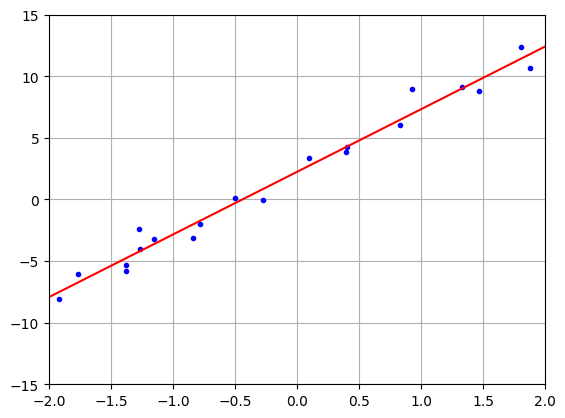

In [6]:
np.random.seed(42)
x_data = np.sort(-2. + 4. * np.random.rand(20))
y_data = 5. * x_data + 2.5 + np.random.randn(20)

X = torch.tensor(x_data[:,np.newaxis], dtype=torch.float32)
Y = torch.tensor(y_data[:,np.newaxis], dtype=torch.float32)

# Linear regression hypothesis using Pytorch
h = nn.Linear(1, 1, bias=True) # h = w x + b

optimizer = optim.SGD(h.parameters(), lr = .1) # stochastic gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

for i in range(50):
    optimizer.zero_grad()
    out = h(X)
    loss = Cost(out, Y)
    loss.backward()
    optimizer.step()


plt.plot(x_data, y_data, 'b.')
x = torch.tensor(np.linspace(-2.0, 2.0, 100).reshape(-1,1), dtype=torch.float32)
y = h(x).detach().numpy()
plt.plot(x,y,'r')
plt.ylim([-15, 15])
plt.xlim([-2, 2])
plt.grid('on')

## Single Layer Neural Network
you can 

Epoch [500/10000], Loss: 12.3209
Epoch [1000/10000], Loss: 9.1968
Epoch [1500/10000], Loss: 8.9845
Epoch [2000/10000], Loss: 9.5758
Epoch [2500/10000], Loss: 10.3846
Epoch [3000/10000], Loss: 9.1755
Epoch [3500/10000], Loss: 8.6188
Epoch [4000/10000], Loss: 6.8555
Epoch [4500/10000], Loss: 4.2067
Epoch [5000/10000], Loss: 2.9730
Epoch [5500/10000], Loss: 2.8570
Epoch [6000/10000], Loss: 2.6352
Epoch [6500/10000], Loss: 2.2332
Epoch [7000/10000], Loss: 2.1239
Epoch [7500/10000], Loss: 1.9617
Epoch [8000/10000], Loss: 1.7194
Epoch [8500/10000], Loss: 1.8772
Epoch [9000/10000], Loss: 1.5837
Epoch [9500/10000], Loss: 1.5675
Epoch [10000/10000], Loss: 1.4632


Text(0.5, 1.0, 'Synthetic data')

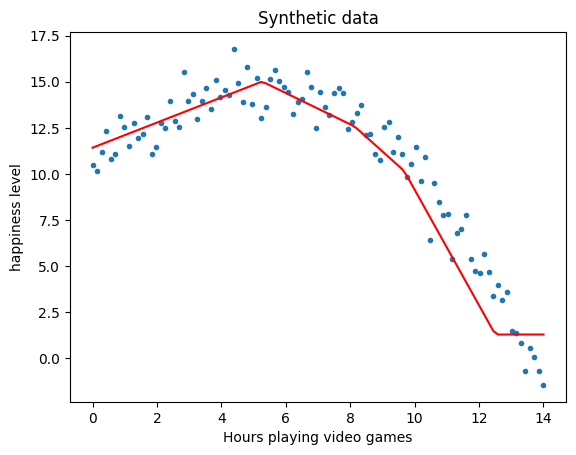

In [7]:
# Generate synthetic data for number of hours spend on video games vs happiness level
np.random.seed(42)
hours = torch.linspace(0, 14, 100).view(-1, 1) # 100 numbers between 0 and 14
happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2
x = hours
y = happiness
# Define a neural network
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(1, 6, bias=True)  # Input to hidden layer       
        self.layer2 = nn.Linear(6, 6)  
        self.layer3 = nn.Linear(6, 1)  # Hidden layer to output

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Instantiate the model, define loss function, and optimizer
model = MyModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    # Compute the loss
    loss = criterion(y_pred, y)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


## Plot the results
plt.plot(x,y, '.')
out = model(x)
plt.plot(x,out.detach().numpy(), 'r')
plt.xlabel('Hours playing video games')
plt.ylabel('happiness level')
plt.title('Synthetic data')

# MNIST Image Classification
### 1.  Loading the MNIST dataset

In [8]:
training_data = datasets.MNIST(
    root='~/Downloads/',
    train=True,
    download=True,
    transform=transforms.Compose([
              transforms.ToTensor()])
              #transforms.Normalize((0.1307,), (0.3081,))])
)

test_data = datasets.MNIST(
    root='~/Downloads/',
    train=False,
    download=True,
    transform=ToTensor()
)

content = """
The data is contained in the ```training_data.data``` and the labels
in ```training_data.targets```
"""

batchsize = 64
train_dataloader = DataLoader(training_data, batch_size=batchsize, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

Markdown(content)


The data is contained in the ```training_data.data``` and the labels
in ```training_data.targets```


In [9]:
# Define a neural network
#class ZeroRecognizer(nn.Module):
#    def __init__(self):
#        super(MyModel, self).__init__()
#        self.layer1 = nn.Linear(784, 1, bias=True) 

#    def forward(self, x):
#        x = torch.log_softmax(self.layer1(x))
#        return x

### 2.  Create a multiclass logistic regression (softmax) model and train

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

hypothesis = nn.Sequential(
    nn.Linear(in_features=784, out_features=10, bias=True), 
    nn.LogSoftmax(dim=1)) 
hypothesis.to(device)

optimizer = optim.SGD(hypothesis.parameters(), lr = .001) # stochastic gradient descent with learning rate lr
Cost = nn.NLLLoss() # Negative log likelihood loss

J_history = []
for epoch in range(10):
    running_loss = 0
    for i, data in enumerate(train_dataloader):
        
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        inputs = inputs.reshape(inputs.shape[0],-1)
        
        optimizer.zero_grad()
        # forward pass
        out = hypothesis(inputs)

        loss = Cost(out, labels)

        # backward pass
        loss.backward()

        # update paramters
        optimizer.step()

        
        running_loss += loss.item()
        
        if i%300 == 0:
            print(f'Epoch {epoch+1}:{i+1} Loss: {loss.item()}')
            
    J_history += [running_loss]

Epoch 1:1 Loss: 2.3037242889404297
Epoch 1:301 Loss: 2.0702991485595703
Epoch 1:601 Loss: 1.8106541633605957
Epoch 1:901 Loss: 1.6225106716156006
Epoch 2:1 Loss: 1.6726446151733398
Epoch 2:301 Loss: 1.4359238147735596
Epoch 2:601 Loss: 1.3396376371383667
Epoch 2:901 Loss: 1.2735121250152588
Epoch 3:1 Loss: 1.3065954446792603
Epoch 3:301 Loss: 1.1111679077148438
Epoch 3:601 Loss: 1.1096255779266357
Epoch 3:901 Loss: 1.02958083152771
Epoch 4:1 Loss: 1.0187733173370361
Epoch 4:301 Loss: 1.028759479522705
Epoch 4:601 Loss: 0.8436399102210999
Epoch 4:901 Loss: 0.9277356266975403
Epoch 5:1 Loss: 0.8994811177253723
Epoch 5:301 Loss: 0.8651164770126343
Epoch 5:601 Loss: 0.7427498698234558
Epoch 5:901 Loss: 0.7043920159339905
Epoch 6:1 Loss: 0.7523090243339539
Epoch 6:301 Loss: 0.6409417390823364
Epoch 6:601 Loss: 0.978885293006897
Epoch 6:901 Loss: 0.7174798250198364
Epoch 7:1 Loss: 0.829200804233551
Epoch 7:301 Loss: 0.8020694851875305
Epoch 7:601 Loss: 0.8736323118209839
Epoch 7:901 Loss: 0.

### 3. Plot Convergence plot of gradient descent with respect to no of epochs

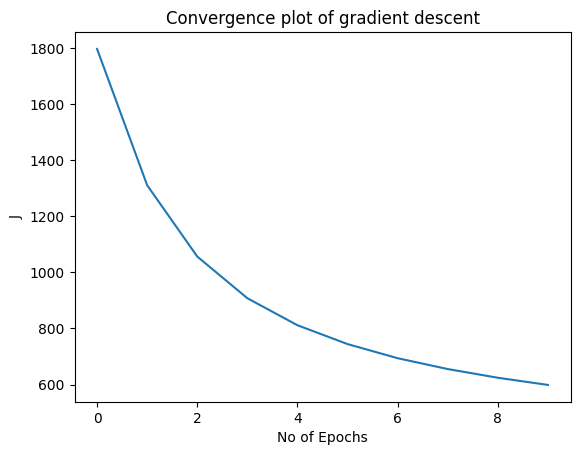

In [11]:
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of Epochs')
plt.ylabel('J')
plt.show()

### 4. Test on a batch of test images and display images with the predicted label

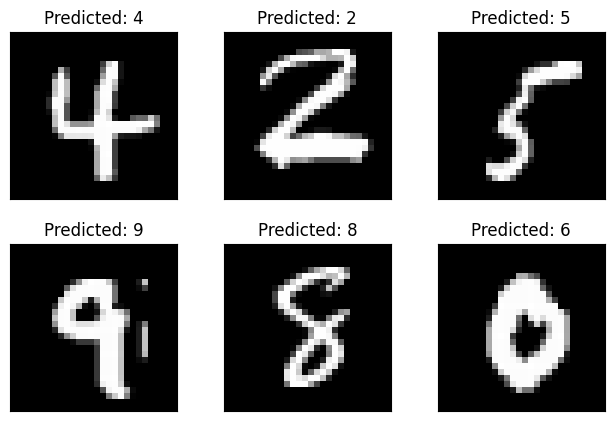

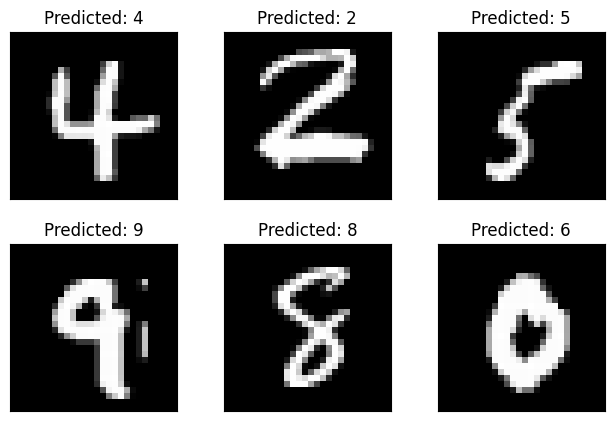

In [12]:
import matplotlib.pyplot as plt

# test on one batch of test data
inputs_im, labels =  next(iter(test_dataloader))
inputs = inputs_im.to(device)
labels = labels.to(device)
inputs = inputs.reshape(inputs.shape[0],-1)
out = hypothesis(inputs)
pr = torch.argmax(out, dim=1) # predicted labels

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    im = torch.squeeze(inputs_im[i].detach(), dim=0).numpy()
    plt.imshow(im, cmap='gray', interpolation='none')
    plt.title("Predicted: {}".format(pr[i]))
    plt.xticks([])
    plt.yticks([])
fig